# Linear Regression model - House price prediction model



## A successful machine learning project follows a comprehensive seven-step checklist



1. Look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data for machine learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
8. Launch, monitor, and maintain your system

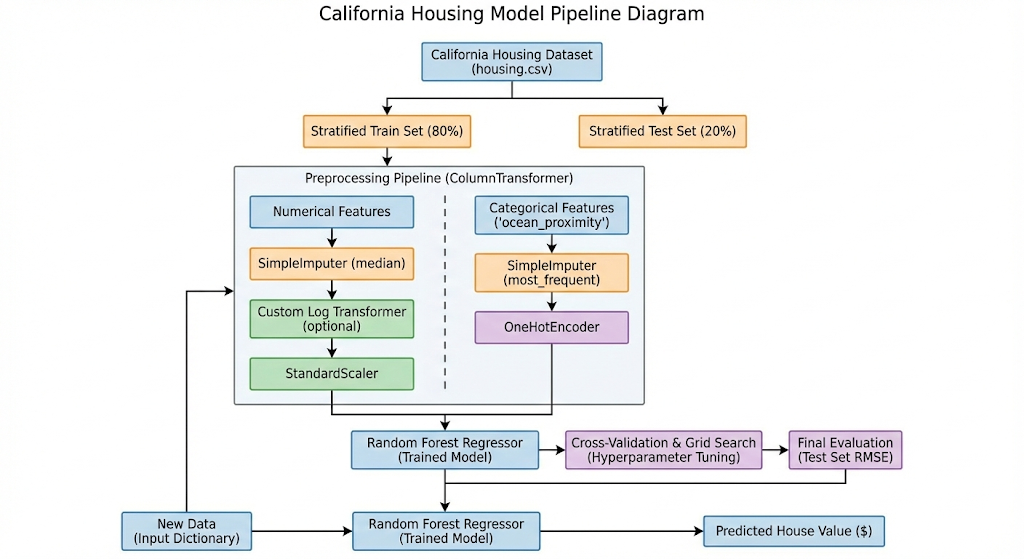

### Get the data

Rather than manually downloading and decompressing the data, it’s usually
preferable to write a function that does it for you. This is useful in particular
if the data changes regularly:

In [2]:
import numpy as np
import pandas as pd
from markdown_it.common.html_re import attribute
from matplotlib.pyplot import grid
from tensorflow.python.ops.metrics_impl import root_mean_squared_error

housing = pd.read_csv('data/housing.csv')


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


now lets get some quick info about the dataset like non-null, each attribute types total number of rows  values and other things

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# this function will give a quick numeric info about the numeric cols
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


All the cols are numeric except one `ocean_proximity`, it is a categorical col because it has repetitive values

In [6]:
# count the values of ocean_proximity attribute
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

let's do some graphical way for the data  analysis

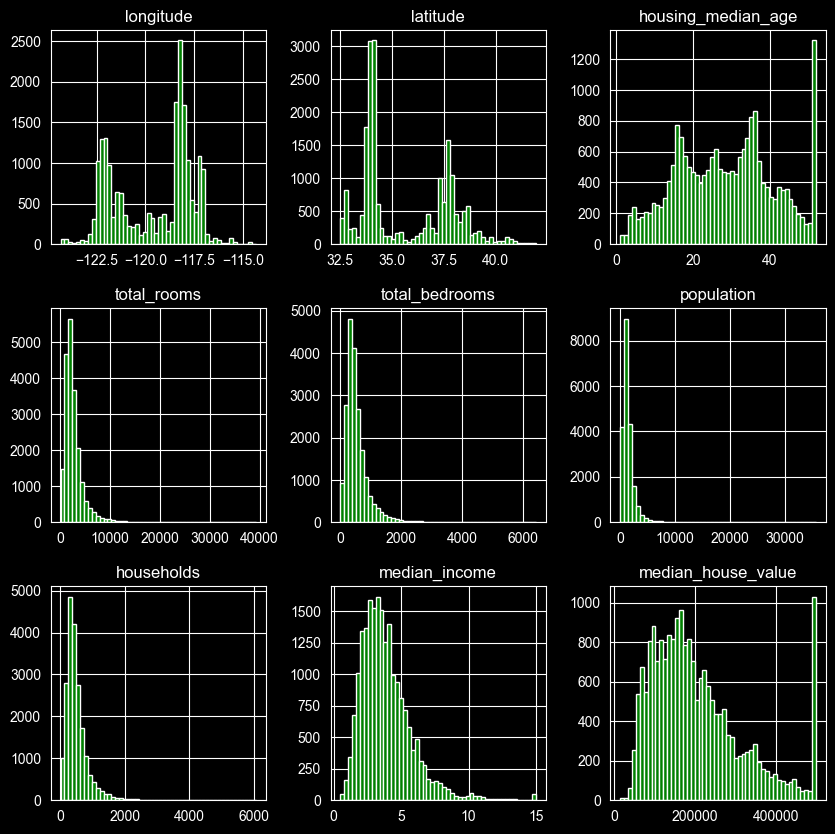

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,10), color='green')
plt.show()

### Create a testset

lets use sciket-learn library for splitting the data in test and training data

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
len(train_set)

16512

In [10]:
len(test_set)

4128

here median income is very useful for the median housing price ,since most of the income is grouped among 0 to 6 and some part at 15 it is very  important to have a sufficient number of instances in your dataset for each stratum

The following code uses the pd.cut() function to create an income category
attribute with five categories (labeled from 1 to 5); category 1 ranges from 0
to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on

In [11]:


# 1. Create income_cat by binning the median_income column
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# 2. Verify it exists
print(housing["income_cat"].value_counts().sort_index())

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [13]:
strat_train_set, strat_test_set = strat_splits[0]

In [14]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

### Explore and visualize the data to gain insights.


let's make sure we work on a training set not on test set Since we are  going to experiment with various
transformations of the full training set, you should make a copy of the
original so we can revert


In [15]:
housing = strat_train_set.copy()

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [17]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


 lets visulize the geographical data

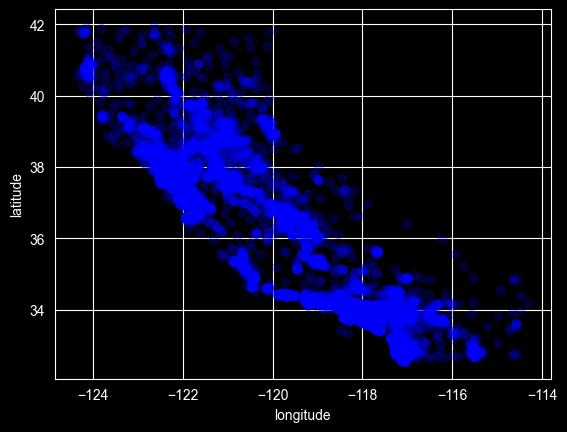

In [18]:
plt.scatter('longitude', 'latitude', data=housing, color='blue', alpha=0.2)
plt.grid(True) # Grid is usually a separate command
plt.xlabel('longitude') # You must manually add labels
plt.ylabel('latitude')
plt.show()

let's make it more advance size of dot represents population and color represents the price of median house

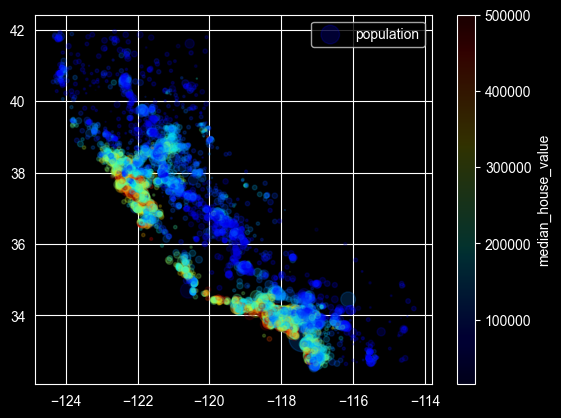

In [19]:
plt.scatter(data=housing,x='longitude', y='latitude', alpha=0.2,
            s=housing['population']/100,label='population', marker='o',
            c=housing['median_house_value'],cmap="jet")
plt.colorbar(label='median_house_value')
plt.legend()
plt.grid(True)
plt.show()

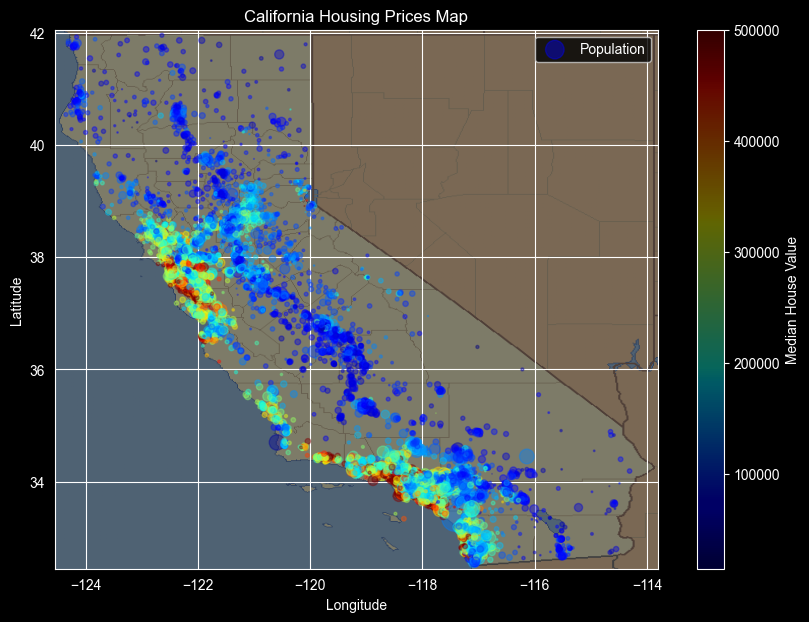

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Load the image
# Make sure "california.png" is in the same folder as your script, or provide the full path
california_img = mpimg.imread("data/california.png")

plt.figure(figsize=(10, 7))

# 2. Show the image
# 'extent' maps the image pixels to your data's coordinates: [min_x, max_x, min_y, max_y]
# These specific numbers map the California image to real longitude/latitude lines
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# 3. Overlay the Scatter Plot
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4,
            s=housing['population']/100, label="Population",
            c=housing['median_house_value'], cmap="jet",
            marker='o')

plt.colorbar(label='Median House Value')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices Map")

plt.show()

now lets look for an correlation between all the attributes

In [21]:
# numeric_only=True tells pandas to skip string columns automatically
corr_matrix = housing.corr(numeric_only=True)

print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


Another way to check for correlation between attributes is to use the Pandas
scatter_matrix() function, which plots every numerical attribute against every
other numerical attribute

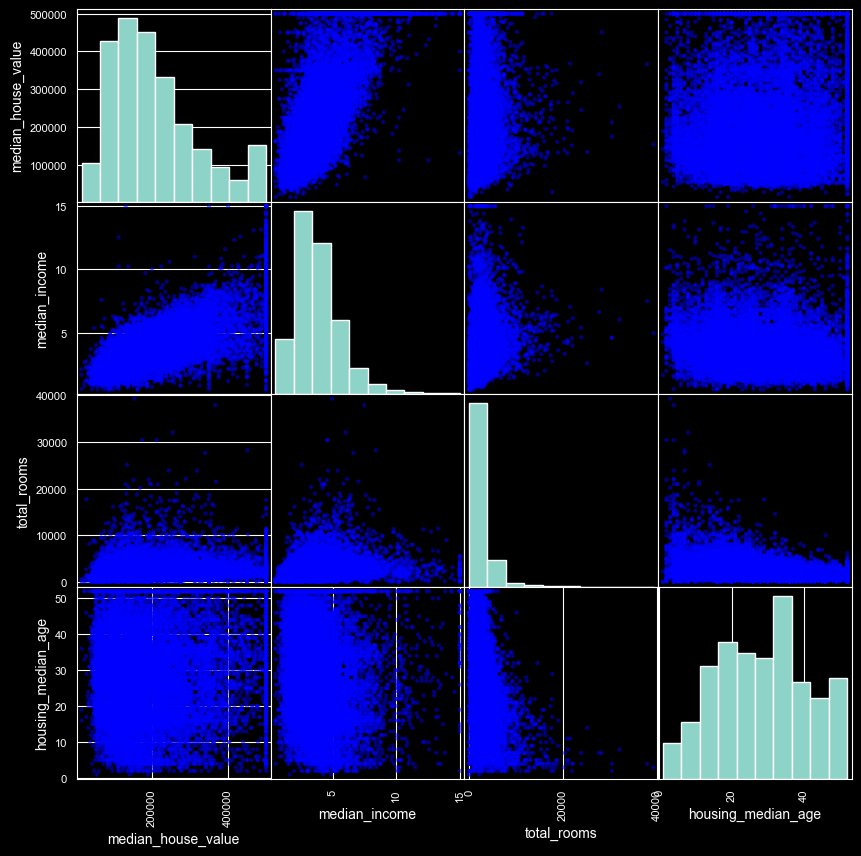

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value',"median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,10),alpha=0.5,color='blue')
plt.show()


Experimenting with Attribute Combinations

In [23]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [24]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

 ### Prepare the Data for Machine Learning Algorithms


hLet's revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, unless you pass inplace=True):

In [25]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels =strat_train_set['median_house_value'].copy()

#### Data cleaning


first of all lets deal with the missing values in the data set
major we have an 2 option to handle with missing vales
1. drop the whole row or an attribute
2. impute the missing values by some other values



we will go with an 2 option of imputation

You decide to go for option  since it is the least destructive, but instead of
the preceding code, you will use a handy Scikit-Learn class: SimpleImputer.

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

Separating out the numerical attributes to use the "median" strategy (as it cannot be calculated on text attributes like ocean_proximity):

In [27]:
housing_num = housing.select_dtypes(include=np.number)

In [28]:
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [29]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transform the training set:

In [30]:
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [32]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


 #### Handling Text and Categorical Attributes

lets deal with non numeric column which is ocean_proximity , only one in dataset

In [33]:
housing_cat = housing[['ocean_proximity']]

In [34]:
housing_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


 Most
machine learning algorithms prefer to work with numbers, so let’s convert
these categories from text to numbers. For this, we can use Scikit-Learn’s
OrdinalEncoder class:

In [35]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

In [36]:


# BAD: Returns a 1D Series (causing your error)
# housing_cat = housing["ocean_proximity"]

# GOOD: Returns a 2D DataFrame (fixes the error)


ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print(housing_cat_encoded[:8])

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]]


In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

now create a one-hot encoder for the `ocean_proximaty` attribute using scikit-learn . one-hot encoder package

In [38]:
from sklearn.preprocessing import OneHotEncoder


In [39]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [40]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

In [41]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

Alternatively, you can set sparse_output=False when creating the OneHotEncoder (note: the sparse hyperparameter was renamned to sparse_output in Scikit-Learn 1.2):

In [42]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [43]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [44]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [46]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [47]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [48]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [49]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [50]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


#### Feature Scaling and Transformation


In [51]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = minmax_scaler.fit_transform(housing_num)
housing_num_min_max_scaled


array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.87477228,
        -0.73711725, -0.76914801],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.88721657,
        -0.71396565, -0.19485248],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.96277923,
        -0.88872293, -0.67240452],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.9744948 ,
        -0.93651979, -0.63037751],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.93245326,
        -0.81366692, -0.49014496],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.96513355,
        -0.92718447, -0.63697052]], shape=(16512, 8))

In [52]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

So far we’ve only looked at the input features, but the target values may also
need to be transformed. For example, if the target distribution has a heavy
tail, you may choose to replace the target with its logarithm. But if you do,
the regression model will now predict the log of the median house value, not
the median house value itself.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]

scaled_prediction = model.predict(some_new_data)
prediction = target_scaler.inverse_transform(scaled_prediction)

In [54]:
prediction

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

#### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to
write your own for tasks such as custom transformations, cleanup operations,
or combining specific attributes

 it’s often a good idea to
transform features with heavy-tailed distributions by replacing them with
their logarithm (assuming the feature is positive and the tail is on the right).
Let’s create a log-transformer and apply it to the population feature:

In [55]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [56]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [57]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
age_simil_35

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]], shape=(16512, 1))

In [58]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [60]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [61]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]])

In [62]:

similarities[:3].round(2)

array([[0.  , 0.16, 0.82, 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.34],
       [0.17, 0.  , 0.  , 0.  , 0.42, 0.  , 0.9 , 0.  , 0.  , 0.  ],
       [0.08, 0.  , 0.  , 0.16, 0.01, 0.  , 0.  , 0.55, 0.  , 0.  ]])

#### Transformation Pipelines


now lets build a pipline to preprocess the numerical attribute

In [63]:
from sklearn.pipeline import Pipeline

num_pipline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

In [64]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [65]:
from sklearn import set_config

set_config(display='diagram')

num_pipline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a f

In [66]:
housing_num_prepared = num_pipline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

As you saw earlier, if you want to recover a nice DataFrame, you can use the
pipeline’s get_feature_names_out() method

In [67]:
df_housing_num_prepared = pd.DataFrame(
housing_num_prepared, columns=num_pipline.get_feature_names_out(),
index=housing_num.index)

So far, we have handled the categorical columns and the numerical columns
separately. It would be more convenient to have a single transformer capable
of handling all columns, applying the appropriate transformations to each
column. For this, you can use a ColumnTransformer. For example, the
following ColumnTransformer will apply num_pipeline (the one we just
defined) to the numerical attributes and cat_pipeline to the categorical
attribute

In [68]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])

In [69]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object)),
)

In [70]:
housing_prepared = preprocessing.fit_transform(housing)


In [71]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 13))

In [72]:
def column_ratio(X):
        return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
        return ["ratio"]  # feature names out
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [73]:
housing_prepared = preprocessing.fit_transform(housing)

preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

In [74]:
housing_prepared.shape

(16512, 25)

Your project is going really well and you’re almost ready to train some
models! You now want to create a single pipeline that will perform all the
transformations you’ve experimented with up to now. Let’s recap what the
pipeline will do and why:
* Missing values in numerical features will be imputed by replacing them
with the median, as most ML algorithms don’t expect missing values. In
categorical features, missing values will be replaced by the most
frequent category.
* The categorical feature will be one-hot encoded, as most ML algorithms
only accept numerical inputs.

* A few ratio features will be computed and added: bedrooms_ratio,
rooms_per_house, and people_per_house. Hopefully these will better
correlate with the median house value, and thereby help the ML models.

* A few cluster similarity features will also be added. These will likely be
more useful to the model than latitude and longitude.

* Features with a long tail will be replaced by their logarithm, as most
models prefer features with roughly uniform or Gaussian distributions.

* All numerical features will be standardized, as most ML algorithms
prefer when all features have roughly the same scale

### Select and Train a Model


lets train an basic linear regression model on it

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",Pipeline(step...ardScaler())])
,"sparse_threshold sparse_threshold: fl

In [76]:
housing_prediction = lin_reg.predict(housing)
housing_prediction[:5].round(-2)

array([ 70600., 307000., 170600., 188400., 255500.])

In [77]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

 the RMSE
as your performance measure, so you want to measure this regression
model’s RMSE on the whole training set using Scikit-Learn’s
mean_squared_error() function, with the squared argument set to False

In [78]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(housing_labels, housing_prediction)
print(lin_rmse)

68569.57965188505


This is better than nothing, but clearly not a great score: the
median_housing_values of most districts range between $120,000 and
$265,000, so a typical prediction error of $68,628 is really not very
satisfying

let's use some powerful regression model such as decision tree regressor and train it

In [79]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",Pipeline(step...ardScaler())])
,"sparse_threshold sparse_threshol

Now that the model is trained, you evaluate it on the training set:


In [80]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect?
Of course, it is much more likely that the model has badly overfit the data

Better Evaluation Using Cross-Validation


One way to evaluate the decision tree model would be to use the train_
test_split() function to split the training set into a smaller training set and a
validation set, then train your models against the smaller training set and
evaluate them against the validation set. It’s a bit of effort, but nothing too
difficult, and it would work fairly well.

In [81]:
from sklearn.model_selection import cross_val_score
tree_rmse = -cross_val_score(tree_reg, housing, housing_labels,scoring = "neg_root_mean_squared_error",cv=10)



In [82]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     67175.825086
std       3433.742076
min      61539.169328
25%      65222.276487
50%      67541.897975
75%      68189.636099
max      73322.661927
dtype: float64

Let’s try one last model now: the RandomForestRegressor.   random forests work by training many decision trees on random
subsets of the features, then averaging out their predictions. Such models
composed of many other models are called ensembles: they are capable of
boosting the performance of the underlying model (in this case, decision
trees). The code is much the same as earlier:

In [83]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmse = -cross_val_score(forest_reg,housing,housing_labels,
                               scoring = "neg_root_mean_squared_error",cv=10)

In [84]:
pd.Series(forest_rmse).describe()

count       10.000000
mean     47352.507842
std       2489.231710
min      43787.492349
25%      45297.918958
50%      47488.398222
75%      49099.387195
max      51307.088976
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [85]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17613.477032966362

### Fine-Tune Our Model


fine tuning our model is one of the most necessary and important part of model training
one option to fie tune our model is to manually adjust our hyperparameter but it will be very tedious and time consuming process

instead  we will use Grid search from the scikit learn lib
the
following code searches for the best combination of hyperparameter values
for the RandomForestRegressor:

In [95]:
from sklearn.model_selection import GridSearchCV

full_pipline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipline,param_grid=param_grid,cv=3,scoring="neg_root_mean_squared_error")
grid_search.fit(housing,housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity

In [96]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [97]:
grid_search.best_estimator_

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('random_forest', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",Pipeline(step...ardScaler())])
,"sparse_threshold sparse_threshold: float, de

In [98]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by=['mean_test_score'], ascending=False,inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.523553,0.026319,0.096997,0.003424,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-44201.821779,-45090.299910,-46013.586118,-45101.902602,739.695195,1
13,4.380105,0.046395,0.103735,0.007391,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44468.954129,-45608.774714,-46444.954939,-45507.561261,809.867447,2
14,5.164203,0.056712,0.103261,0.005878,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44895.665265,-45718.622726,-46918.669574,-45844.319189,830.656892,3
7,3.389322,0.220997,0.101003,0.006893,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44908.622188,-46199.706739,-47149.073617,-46085.800848,918.199893,4
9,3.306811,0.058711,0.094192,0.003944,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44908.622188,-46199.706739,-47149.073617,-46085.800848,918.199893,4


#### randomized search

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(
full_pipline, param_distributions=param_distribs, n_iter=10, cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'preprocessing__geo__n_clusters': <scipy.stats....00230E82B0350>, 'random_forest__max_features': <scipy.stats....00230E82B0A70>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies th

#### Ensemble methods

Another way to fine-tune your system is to try to combine the models that
perform best. The group (or “ensemble”) will often perform better than the
best individual model

Analyzing the Best Models and Their Errors

In [102]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.15, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.  , 0.01, 0.02, 0.01, 0.02,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.03, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.13])

Let’s sort these importance scores in descending order and display them next
to their corresponding attribute names

In [103]:
sorted(zip(feature_importances,final_model["preprocessing"].get_feature_names_out()),
reverse=True)

[(np.float64(0.15437406991086472), 'log__median_income'),
 (np.float64(0.1304616350403138), 'remainder__income_cat'),
 (np.float64(0.06336390928204289), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.050384306288622636), 'bedrooms__ratio'),
 (np.float64(0.047673070503622954), 'people_per_house__ratio'),
 (np.float64(0.0425824595026656), 'rooms_per_house__ratio'),
 (np.float64(0.03331084326373129), 'geo__Cluster 6 similarity'),
 (np.float64(0.029116453332787763), 'geo__Cluster 43 similarity'),
 (np.float64(0.019632914723650845), 'geo__Cluster 2 similarity'),
 (np.float64(0.019417188629549907), 'geo__Cluster 11 similarity'),
 (np.float64(0.017595389820438682), 'geo__Cluster 15 similarity'),
 (np.float64(0.015054145022754923), 'geo__Cluster 13 similarity'),
 (np.float64(0.01465241647895946), 'geo__Cluster 10 similarity'),
 (np.float64(0.013971549822922006), 'geo__Cluster 24 similarity'),
 (np.float64(0.013911420633792136), 'geo__Cluster 0 similarity'),
 (np.float64(0.013748175024447586), 

#### lets evalute our model on test set

In [110]:
from sklearn.metrics import root_mean_squared_error

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

40009.911284330046


In [111]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval
rmse_lower, rmse_upper

(np.float64(38328.45112664533), np.float64(41838.865427674216))

### Launch, Monitor, and Maintain Your System


In [112]:
import joblib

joblib.dump(final_model, "House-Price-Prediction-Model.pkl")

['House-Price-Prediction-Model.pkl']

In [114]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("House-Price-Prediction-Model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

prediction

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

## Final prediction model

In [116]:
import pandas as pd

# 1. Define the new data manually
# These keys MUST match your original column names exactly
new_data_dict = {
    "longitude": [-122.23],
    "latitude": [37.88],
    "housing_median_age": [41.0],
    "total_rooms": [880.0],
    "total_bedrooms": [129.0],
    "population": [322.0],
    "households": [126.0],
    "median_income": [8.3252],
    "ocean_proximity": ["NEAR BAY"],
    "income_cat": [5]
}

# 2. Convert to DataFrame
new_data = pd.DataFrame(new_data_dict)

# 3. Predict using your loaded model
# The pipeline will handle all scaling/encoding automatically
predictions = final_model_reloaded.predict(new_data)

# 4. Show the result
print(f"Predicted Median House Value: ${predictions[0]:,.2f}")

Predicted Median House Value: $425,075.07
